In [1]:
import numpy as np
import scipy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations
#%matplotlib qt

### Global efficiency example

In [2]:
CM = [[0, 1, 1, 1, 1],
     [1, 0, 1, 1, 1],
     [1, 1, 0, 1, 1],
     [1, 1, 1, 0, 1],
     [1, 1, 1, 1, 0]]
CM = np.array(CM)

CM_2 = [[0, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0]]
CM_2 = np.array(CM_2)

Net = nx.from_numpy_matrix(CM)
Net_2 = nx.from_numpy_matrix(CM_2)

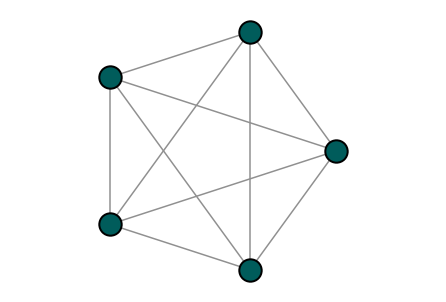

In [3]:
#plt.title(f'Network 2', fontsize=16)
nx.draw_circular(Net, node_color='#005C5B', edge_color='#909090', node_size=500, width=1.5, linewidths=2, edgecolors='black')
plt.axis('equal')
plt.savefig('graphs_examples/global_efficiency_2.pdf')
#plt.tight_layout()

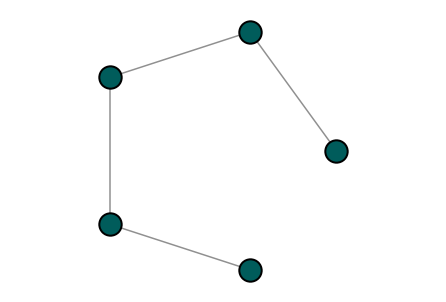

In [5]:
#plt.title(f'Network 1', fontsize=16)
nx.draw_circular(Net_2, node_color='#005C5B', edge_color='#909090', node_size=500, width=1.5, linewidths=2, edgecolors='black')
plt.axis('equal')
plt.savefig('graphs_examples/global_efficiency_1.pdf')

In [50]:
network_to_measure = Net_2
n = len(network_to_measure)
denom = n * (n - 1)
if denom != 0:
    shortest_paths = dict(nx.all_pairs_dijkstra(network_to_measure))
    g_eff = 0
    for u, v in permutations(Net, 2):
        if u in shortest_paths.keys() and v in shortest_paths[u][0].keys():
            g_eff += (1/shortest_paths[u][0][v])
        else:
            g_eff = 0
g_eff

12.833333333333334

### Clustering coefficient example

In [26]:
CM = [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
      [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
     ]
CM = np.array(CM)

CM_2 = [[0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 0]]
CM_2 = np.array(CM_2)

Net = nx.from_numpy_matrix(CM)
Net_2 = nx.from_numpy_matrix(CM_2)

In [21]:
#Net = nx.newman_watts_strogatz_graph(n=200, k=5, p=0.3, seed=42)
Net = nx.powerlaw_cluster_graph(n=20, m=3, p=0.5, seed=42)
#Net_2 = nx.powerlaw_cluster_graph(n=20, m=3, p=0.3, seed=42)

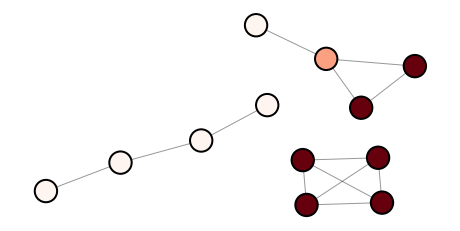

In [45]:
from networkx.drawing.nx_pydot import graphviz_layout
#plt.title(f'Network 2', fontsize=16)
#nx.draw(Net, pos=nx.spring_layout(Net) , node_color='#005C5B', edge_color='#909090', node_size=10, width=1.5)
#plt.axis('equal')
#plt.savefig('graphs_examples/global_efficiency_2.pdf')
#plt.tight_layout()


# color by path length from node near center
p = dict(nx.clustering(Net))
#pos = nx.spring_layout(Net)
pos = graphviz_layout(Net)#, prog='twopi')

plt.figure(figsize=(8, 4))
nx.draw_networkx_edges(Net, pos, alpha=0.4)
nx.draw_networkx_nodes(
    Net,
    pos = pos,
    nodelist=list(p.keys()),
    node_size=500,
    node_color=list(p.values()),
    cmap=plt.cm.Reds,
    linewidths=2,
    edgecolors='black'
)

#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.savefig('graphs_examples/clustering_coefficient_example.pdf')
plt.show()

### Global reaching centrality

In [6]:
CM = [[0, 1, 0, 0, 0, 1],
      [1, 0, 1, 0, 0, 0],
      [0, 1, 0, 1, 0, 0],
      [0, 0, 1, 0, 1, 0],
      [0, 0, 0, 1, 0, 1],
      [1, 0, 0, 0, 1, 0]]
CM = np.array(CM)

CM_2 = [[0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]]
CM_2 = np.array(CM_2)

Net = nx.from_numpy_matrix(CM)
Net_2 = nx.from_numpy_matrix(CM_2)

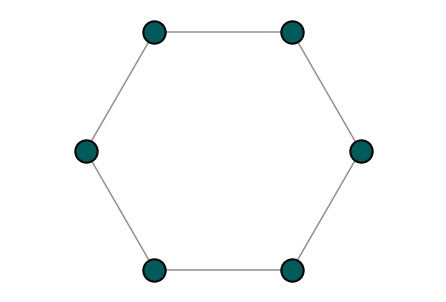

In [17]:
#plt.title(f'Network 2', fontsize=16)
nx.draw_circular(Net, node_color='#005C5B', edge_color='#909090', node_size=500, width=1.5, linewidths=2, edgecolors='black')
plt.axis('equal')
plt.savefig('graphs_examples/global_reaching_centrality_2.pdf')
#plt.tight_layout()

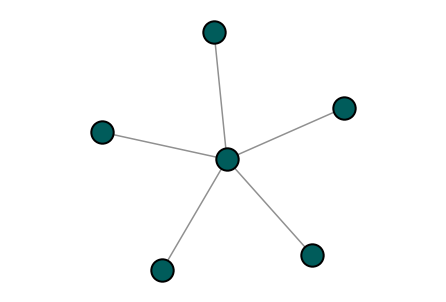

In [18]:
#plt.title(f'Network 1', fontsize=16)
nx.draw_spring(Net_2, node_color='#005C5B', edge_color='#909090', node_size=500, width=1.5, linewidths=2, edgecolors='black')
plt.axis('equal')
plt.savefig('graphs_examples/global_reaching_centrality_1.pdf')

In [12]:
nx.global_reaching_centrality(Net_2)

0.4

In [14]:
nx.global_reaching_centrality(Net)

0.0

### Degree assortativity

(-1.1378050678347509,
 1.2031398480747955,
 -1.1269131520590219,
 1.1180572601841956)

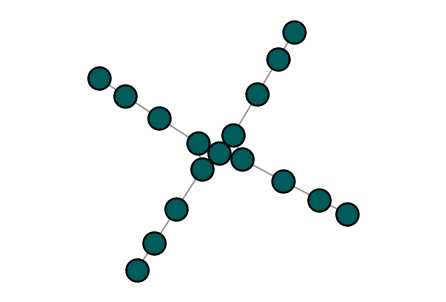

In [107]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(2, 5)
G.add_edge(3, 2)
G.add_edge(3, 4)
G.add_edge(4, 5)

G.add_edge(2, 6)
G.add_edge(6, 7)
G.add_edge(7, 8)

G.add_edge(3, 9)
G.add_edge(9, 10)
G.add_edge(10, 11)

G.add_edge(4, 12)
G.add_edge(12, 13)
G.add_edge(13, 14)

G.add_edge(5, 15)
G.add_edge(15, 16)
G.add_edge(16, 17)

nx.draw_spring(G, node_color='#005C5B', edge_color='#909090', node_size=500, width=1.5, linewidths=2, edgecolors='black')
plt.axis('equal')

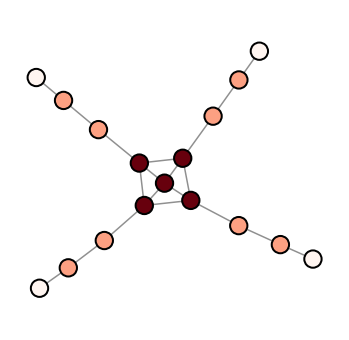

In [110]:
from networkx.drawing.nx_pydot import graphviz_layout
# color by path length from node near center

#nodes = G.nodes()
#n_color = np.asarray([degrees[n] for n in nodes])

p = dict(G.degree()) #Dict with Node ID, Degree
#pos = nx.spring_layout(G)
#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G)
#pos = graphviz_layout(G)#, prog='twopi')

plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos, edge_color='#909090',width=1.5)
nx.draw_networkx_nodes(
    Net,
    pos = pos,
    nodelist=list(p.keys()),
    node_size=300,
    node_color=list(p.values()),
    cmap=plt.cm.Reds,
    linewidths=2,
    edgecolors='black',
)

#plt.xlim(-1.1, 1.1)
#plt.ylim(-1.1, 1.1)
#plt.axis("off")
plt.axis('equal')
plt.axis("off")
plt.box(False)
plt.savefig('graphs_examples/assortativity_1.pdf')
plt.show()

(-0.9032895921481278,
 1.1808555721045733,
 -1.0640570872727133,
 1.064207459475275)

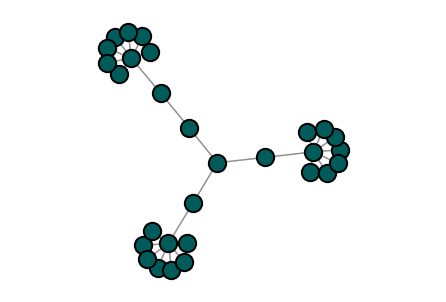

In [111]:
G = nx.Graph()
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(1, 6)
G.add_edge(1, 7)
G.add_edge(1, 8)
G.add_edge(1, 9)
G.add_edge(1, 26)
G.add_edge(1, 27)

G.add_edge(9, 10)
G.add_edge(10, 11)
G.add_edge(10, 16)
G.add_edge(11, 2)

G.add_edge(2, 12)
G.add_edge(2, 13)
G.add_edge(2, 14)
G.add_edge(2, 15)
G.add_edge(2, 23)
G.add_edge(2, 24)
G.add_edge(2, 25)

G.add_edge(16, 17)
G.add_edge(17, 3)

G.add_edge(3, 18)
G.add_edge(3, 19)
G.add_edge(3, 20)
G.add_edge(3, 21)
G.add_edge(3, 22)
G.add_edge(3, 28)
G.add_edge(3, 29)

nx.draw_spring(G, node_color='#005C5B', edge_color='#909090', node_size=300, width=1.5, linewidths=2, edgecolors='black')
plt.axis('equal')

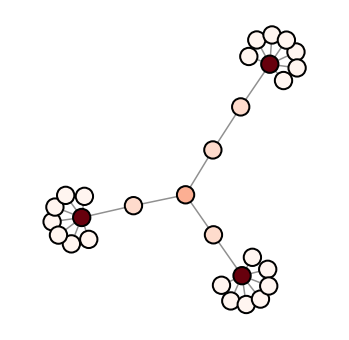

In [112]:
from networkx.drawing.nx_pydot import graphviz_layout
# color by path length from node near center

#nodes = G.nodes()
#n_color = np.asarray([degrees[n] for n in nodes])

p = dict(G.degree()) #Dict with Node ID, Degree
#pos = nx.spring_layout(G)
#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G)
#pos = graphviz_layout(G)#, prog='twopi')

plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos, edge_color='#909090',width=1.5)
nx.draw_networkx_nodes(
    Net,
    pos = pos,
    nodelist=list(p.keys()),
    node_size=300,
    node_color=list(p.values()),
    cmap=plt.cm.Reds,
    linewidths=2,
    edgecolors='black',
)

#plt.xlim(-1.1, 1.1)
#plt.ylim(-1.1, 1.1)
#plt.axis("off")
plt.axis('equal')
plt.axis("off")
plt.box(False)
plt.savefig('graphs_examples/assortativity_2.pdf')
plt.show()